In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dfr = pd.read_excel(r"C:/Users/Jirik/data/SA_data.xlsx")

In [165]:

dtu = dfr["Experiment Datetime"].unique()
dtu

array([nan, '2019-10-21 15:43:20', '2019-10-22 20:32:18',
       '2019-10-22 21:25:45', '2019-10-22 21:56:19',
       '2019-10-22 22:01:16', '2019-10-22 22:42:08',
       '2019-10-22 22:47:07', '2019-10-26 11:29:49',
       '2019-10-26 11:31:38', '2019-10-26 17:04:17',
       '2019-10-26 17:19:22', '2019-10-27 00:44:44',
       '2019-10-27 00:49:37', '2019-10-28 10:35:37',
       '2019-10-28 11:08:19', '2019-10-31 10:27:05',
       '2019-10-31 10:51:15', '2019-10-31 11:00:19',
       '2019-10-31 15:57:08', '2019-10-31 16:10:53',
       '2019-10-31 16:39:41', '2019-10-31 16:45:20',
       '2019-11-01 15:15:39', '2019-11-01 15:19:37',
       '2019-11-01 20:03:12', '2019-11-01 21:26:44',
       '2019-11-02 07:29:08', '2019-11-02 07:59:34',
       '2019-11-02 08:06:34', '2019-11-02 23:13:08',
       '2019-11-02 23:21:11', '2019-11-03 07:54:27',
       '2019-11-03 22:37:09', '2019-11-05 22:37:57',
       '2020-01-15 23:26:52', '2020-01-15 23:39:21',
       '2020-01-16 11:46:55', '2020-01-16

In [166]:
selected_dt  ="2020-05-27 12:03:07"
selected_dt = dtu[-1]
df = dfr[dfr["Experiment Datetime"] == selected_dt]
selected_dt
# df["Experiment Datetime"]

'2020-05-27 22:53:53'

# Looking for pairs

In [167]:
dfmean=df.groupby(by="File Name",as_index=False).mean()
dfmean

,File Name,Annotation Center X [mm],Annotation Center Y [mm],Annotation ID,Area,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,Dead ends number,...,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Processing;Whole Scan Margin,Scan Segmentation Empty Area [mm^2],Scan Segmentation Septum Area [mm^2],Scan Segmentation Sinusoidal Area [mm^2],Scan Segmentation Used Pixelsize [mm],Skeleton length,profile unet cumulative get_region_image time [s],profile unet cumulative prediction time [s]
0,05_2019_11_12__-1-2.czi,-1.497896,-0.561236,9.500000,0.877946,22560.500000,NaN,NaN,0.030098,1713.0,...,NaN,NaN,0.0,49.440404,23.889523,36.421870,0.007027,48.078182,52.860750,73.024806
1,PIG-003_J-18-0165_HE.ndpi,7.120836,-1.661185,7.666667,0.793383,19601.166667,1.0,1.0,0.031227,1815.5,...,NaN,NaN,0.0,72.039471,20.068190,40.716001,0.007272,39.858910,1.755781,81.737620


In [168]:
df1 = pd.merge(
    df,
    dfmean[["File Name", "Annotation ID", "Annotation Center X [mm]", "Annotation Center Y [mm]"]], 
    on=["File Name"], how="outer", suffixes=(""," mean"))

df1["Annotation Center X [mm] relative"] = df1["Annotation Center X [mm]"] - df1["Annotation Center X [mm] mean"]
df1["Annotation Center Y [mm] relative"] = df1["Annotation Center Y [mm]"] - df1["Annotation Center Y [mm] mean"]
df1[["Annotation Center X [mm] relative", "Annotation Center Y [mm] relative"]]

,Annotation Center X [mm] relative,Annotation Center Y [mm] relative
0,-0.698981,-0.967007
1,1.436557,-1.968404
2,-0.288665,0.412296
3,3.027378,0.340458
4,-1.367693,0.459474
5,-2.108596,1.723182
6,1.405265,-1.951661
7,-0.654139,-1.017943
8,3.017761,0.222132
9,-0.218695,0.465060


## Visualization of points

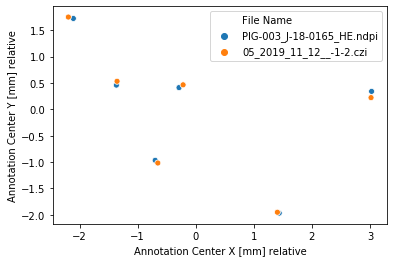

In [169]:
sns.scatterplot(data=df1, x="Annotation Center X [mm] relative", y="Annotation Center Y [mm] relative", hue="File Name")


## Matching

In [170]:
def find_id_of_nearest(df1, key, key2 = None, df2 = None ):
    if key2 is None:
        key2 = key

    if df2 is None:
        df2 = df1

    inds = np.zeros(len(df1), dtype=int)
    for i in range(len(df1)):
        norm_i = np.linalg.norm(np.asarray(df1[key].values - df2.iloc[i][key2].values, dtype=float), axis=1)
        if df1 is df2:
            norm_i[i] = None
        inds[i] = np.nanargmin(norm_i)
    return inds
#     df1.iloc[i,]

key = ["Annotation Center X [mm] relative","Annotation Center Y [mm] relative"]
inds = find_id_of_nearest(df1, key)
inds

# norm_i

array([ 7,  6,  9,  8, 10, 11,  1,  0,  3,  2,  4,  5])

# See the difference

In [171]:
for i in df1.keys(): print(i)


Annotation Center X [mm]
Annotation Center Y [mm]
Annotation Color
Annotation Details
Annotation ID
Annotation Title
Area
Area unit
Branch number
Central Vein Dice
Central Vein Jaccard
Central vein area
Datetime
Dead ends number
Experiment Datetime
Experiment Title
File Name
File Path
GLCM Correlation
GLCM Correlation p10
GLCM Correlation p25
GLCM Correlation p50
GLCM Correlation p75
GLCM Correlation p90
GLCM Correlation var
GLCM Energy
GLCM Energy p10
GLCM Energy p25
GLCM Energy p50
GLCM Energy p75
GLCM Energy p90
GLCM Energy var
GLCM Homogenity
GLCM Homogenity p10
GLCM Homogenity p25
GLCM Homogenity p50
GLCM Homogenity p75
GLCM Homogenity p90
GLCM Homogenity var
Input;Automatic Lobulus Selection
Input;Data Info
Input;File Path
Input;Whole Scan Margin
Job ID
Lobulus Border Dice
Lobulus Border Jaccard
Lobulus Boundary Compactness
Lobulus Equivalent Diameter
Lobulus Equivalent Surface
Lobulus Perimeter
Output Directory Path
Output image size 0
Output image size 1
Output pixel size 0
Out

In [172]:
suffix_2 = "_second"

df1["pair_index"] = inds
df2=df1[df1["File Name"] == un[0]]
df_compare = pd.merge(df2, df1, left_on="pair_index", right_index=True, suffixes=("", suffix_2))

In [173]:
keys1 = ["Area", "SNI area prediction", 
     "Lobulus Boundary Compactness",
      "Lobulus Perimeter",
      "Skeleton length",
        "Branch number",
     ]

keys2 = [key + suffix_2 for key in keys1]

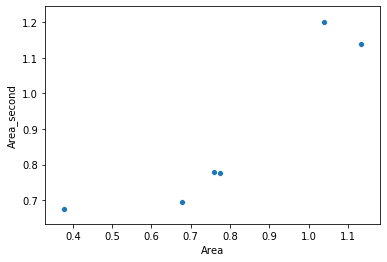

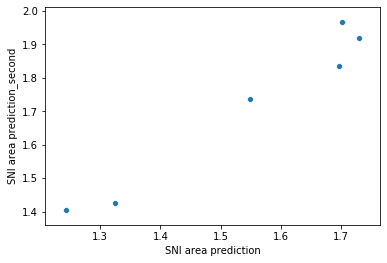

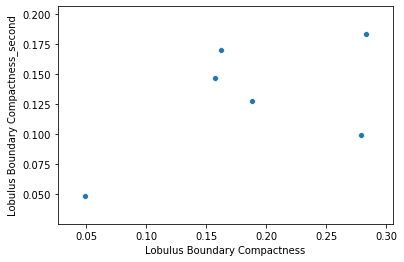

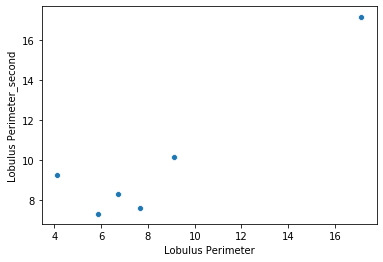

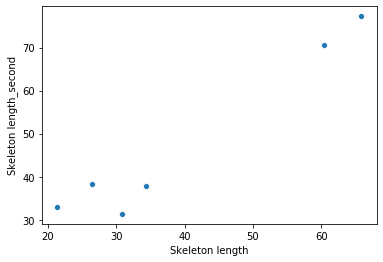

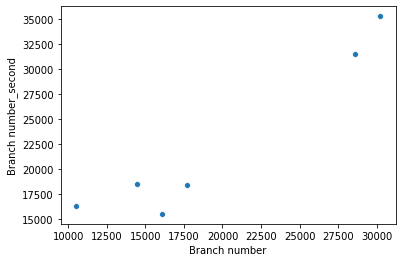

In [174]:
for i in range(len(keys1)):
    plt.figure()
    sns.scatterplot(keys1[i], keys2[i], data=df_compare)
# g = sns.pairplot(df_compare, x_vars=keys1, y_vars=keys2)